# Support sur les fondamentaux 

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

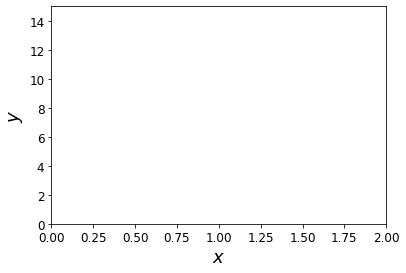

In [1]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Préparation et initialisation

### Chargement des packages

In [2]:
import numpy as np
import sys
import glob
import os

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn import datasets

### Quelques fonctions

In [3]:
## Calcul de  points de manière inconnue
def computePoints(m):
    X1 = 10*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 10 
    X2 = 10*np.random.rand(m, 1) # m valeurs aléatoires de 0 à 10 
    y =4 + 2 * X1 + 3* X2 + 10*np.random.randn(m, 1) # m valeurs de y coorespondantes à x1 et x2
    return [X1,X2,y]

## Calcul de  points de manière inconnue
def computepolyPoints(m):  
    e=3
    n=3127
    d=2011
    X = 6 * np.random.rand(m, 1) - 3 # 200 valeurs aléatoires de -3 à +3
    y = 3 * 8*X*X*X*X+ 23*X*X*X+ X**2 + X + 4 + np.random.randn(m, 1) # 200 y coorespondants à x
    return [X,y]

# Fonction Sigmoid
def sig(t):
    return 1 / (1 + np.exp(-t))

## Calcul de  points de manière inconnue
def computeLogistic(m,n):
    val = 10*np.random.rand(n, 1) # m valeurs aléatoires de 0 à 10 
    X = 5*np.random.rand(m, n) # m valeurs aléatoires de 0 à 5
    y_temp=X.dot(val)
    maxi=max(y_temp)
    mini=min(y_temp)
    y_norm=10-(y_temp-mini)/(maxi-mini)*20
    y_proba=sig(y_norm)
    y=np.round(y_proba)
    return [X,y]

## Calcul de  points de manière inconnue
def computeSoftMax(m,n,k):
    #val = 10*np.random.rand(n, k) # m valeurs aléatoires de 0 à 10 
    X = 5*np.random.rand(m, n) # m valeurs aléatoires de 0 à 5
    y=0*np.random.rand(m, 1)
    for cpt in range(0, m): 
        classe=int(np.round(k*np.random.rand(1, 1)))
        y[cpt]=classe
    return [X,y]


## Exemple 1 

In [4]:
m=100;
n=3;

ModuleNotFoundError: No module named 'dash'

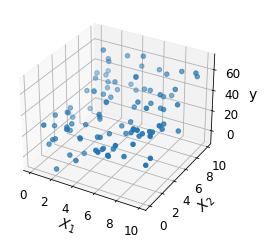

In [5]:
#%matplotlib qt

[X1,X2,y]=computePoints(m)

# importing mplot3d toolkits, numpy and matplotlib 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
#fig = plt.figure() 
mpl.rcParams['legend.fontsize'] = 10
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
  

# plotting 
ax.scatter(X1.flatten(),X2.flatten(),y.flatten());
plt.xlabel('$X_1$');
plt.ylabel('$X_2$');
ax.set_zlabel('y');

# rotate the axes and update
#for angle in range(0, 360):
#   ax.view_init(30, 40)

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(data=[go.Scatter3d(
    x=X1.flatten(),
    y=X2.flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

fig.write_html("ex1.html")

plt.show() 

1. m = 100 &rarr; 100 points, c'est-à-dire 100 mesures $(x_i, y_i)$ 
2. n = 3 : $y=\theta_0+\theta_1X_1+\theta_2X_2$
3. X : valeurs en bas, y valeurs correspondantes verticalement et $\Theta$ le modèle à calculer
4. L'inconnu est donc $\Theta$ 


In [ ]:
%matplotlib qt

[X1,X2,y]=computePoints(m)

# importing mplot3d toolkits, numpy and matplotlib 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
mpl.rcParams['legend.fontsize'] = 10
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
  
X = np.outer(np.linspace(0, 10, 100), np.ones(100)) 
Y = X.copy().T
Z =4 + 2 * X + 3* Y  

# plotting 
ax.plot_surface(X, Y, Z, cmap ='viridis') ;
ax.scatter(X1.flatten(),X2.flatten(),y.flatten());
plt.xlabel('$X_1$');
plt.ylabel('$X_2$');
ax.set_zlabel('y');

# rotate the axes and update
for angle in range(0, 360):
   ax.view_init(30, 40)


fig = go.Figure(data=[go.Scatter3d(
    x=X1.flatten(),
    y=X2.flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

fig.add_trace( 
    go.Surface(
    x=X,
    y=Y,
    z=Z
    )
)

fig.write_html("ex2.html")

plt.show() 

1. Equation normale ou descente de gradient
2. Equation normale car n est petit

- Où sont $X$, $\Theta$ et $y$ dans ce problème ?
- Quelle est la solution **la plus précise et la plus rapide** pour construire le modèle ?
- Quels sont les caractéristiques qui vont **augmenter la précision** du modèle ?
- Quels seront les hyper-paramètres à régler ?


## Exemple 2

1. Où sont $X$, $\Theta$ et $y$ dans ce problème ?

X &rarr; les données du capteur
y &rarr; la longévité
$\Theta$ &rarr; les paramètres du modèle

2. Quelle est la solution **la plus précise et la plus rapide** pour construire le modèle ?

Gradient conjugé Stochastique

3. Quels sont les caractéristiques qui vont **augmenter la précision** du modèle ?

Augmenté le nombre de données et le nombre de joueurs témoins

4. Quels seront les hyper-paramètres à régler ?

Le taux d'apprentissage et la taille des mini-lots

Lequel des 2 algorythmes semble le plus précis ?

## Exemple 3

In [ ]:
from sklearn.linear_model import LinearRegression
## Calcul et affichage des points
m=300
[X,y]=computepolyPoints(m)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-6, 6, -2, 100])

## Transformation des données d'apprentissage en polynôme
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=50, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Regression linéire sur ce polynôme
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Affichage du résultat 
X_new=np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(x=X.flatten(), y=y.flatten())

fig.write_html("ex3.html")

plt.show() 


- Où sont $X$, $\Theta$ et $y$ ?

X → les abcisses
y → les ordonnées
Θ → les paramètres du modèle
  
- Quel est l'**inconnu** pour construire le modèle ?

Θ 

- Quelle est la méthode à utiliser ?

RÉGRESSION POLYNOMIALE

- Quels seront les hyper-paramètres à régler ?

Le taux d'apprentissage, la taille des mini-lots et le degré du polynome

In [ ]:
from sklearn.linear_model import LinearRegression
## Calcul et affichage des points
m=300
[X,y]=computepolyPoints(m)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-6, 6, -2, 100])

## Transformation des données d'apprentissage en polynôme
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=50, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Regression linéire sur ce polynôme
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Affichage du résultat 
X_new=np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(x=X.flatten(), y=y.flatten())

fig.add_trace( 
    go.Scatter(x=X_new.flatten(), y=y_new.flatten(), line = dict(color='red'))
)

fig.write_html("ex4.html")

plt.show() 


In [ ]:
from sklearn.linear_model import LinearRegression
## Calcul et affichage des points
m=300
[X,y]=computepolyPoints(m)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-6, 6, -2, 100])

## Transformation des données d'apprentissage en polynôme
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Regression linéire sur ce polynôme
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Affichage du résultat 
X_new=np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(x=X.flatten(), y=y.flatten())

fig.add_trace( 
    go.Scatter(x=X_new.flatten(), y=y_new.flatten(), line = dict(color='red'))
)

fig.write_html("ex5.html")

plt.show() 


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    plt.axis([0, 200, -0.1, 20])

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plt.figure(figsize=(8, 4))
plot_learning_curves(polynomial_regression, X, y)
save_fig("learn1")

In [ ]:
from sklearn.pipeline import Pipeline

m=300
[X,y]=computepolyPoints(m)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-6, 6, -2, 100])



poly_features = PolynomialFeatures(degree=30, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Regression linéire sur ce polynôme
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=30, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plt.figure(figsize=(8, 4))
plot_learning_curves(polynomial_regression, X, y)
save_fig("learn2")

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plt.figure(figsize=(8, 4))
plot_learning_curves(polynomial_regression, X, y)
save_fig("learn3")

## Exemple 4

In [ ]:
m=100
n=150
[X,y]=computeLogistic(m,n)
plt.plot(y, "b.")
print(y)

Pour un ensemble de **100 données** on a le couple (X,y) avec y est soit oui (1) soit non (2). Chaque x contient **150 mesures**.

In [ ]:
## Apprentissage du modèle

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=10000, random_state=42)
# C est est pour la régularisation
log_reg.fit(X, y.ravel())

## Affichage du résultat
theta=log_reg.coef_ # theta
y_temp=X.dot(log_reg.coef_.ravel()) # y correspondant à X.theta
y_proba=sig(y_temp) # Sigmoid
plt.plot(y_temp,y_proba, "b.")

In [ ]:
## Test du modèle
X_test=X[1:10]
y_test=y[1:10]
print(y_test.ravel())

In [ ]:
y_predict = log_reg.predict_proba(X_test)
print(y_predict.ravel())

In [ ]:
y_predict = log_reg.predict(X_test)
print(y_predict.ravel())

**Exercice** : faire varier **m** et **n**

## Exemple 5

In [ ]:
m=100
n=200
k=5
[X,y]=computeSoftMax(m,n,k)
#for cpt in range(0, m): 
#    print(y[cpt].ravel())

Pour un ensemble de **m données** on a le couple (X,y) avec y qui appartient à une des **k classes**. Chaque x contient **n mesures**.

In [ ]:
## Apprentissage du modèle

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
y_C1=y[:,0]
softmax_reg.fit(X, y_C1.ravel())

In [ ]:

plt.plot(X[y.ravel()==2, 0], X[y.ravel()==2, 1], "g^", label="classe 2")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "bs", label="classe 1")
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "yo", label="classe 0")

plt.show()

In [ ]:
## Test du modèle
X_test=X[1:10]
y_test=y[1:10]
print(y_test.ravel())

In [ ]:
y_predict = softmax_reg.predict(X_test)
print(y_predict.ravel())

**Exercice** : faire varier **m** et **n**